<div style="background-color: red; color: darkblue; font-size: 34px; padding: 15px;">Authorship: Nikolin Prenga</div>

<div style="background-color: red; color: darkblue; font-size: 34px; padding: 15px;">Created on 16 Jun, 2024</div>

<div style="background-color: lime; color: darkblue; font-size: 24px; padding: 10px;">  This script was prepared by Nikolin Prenga, to assist researchers and data scientists in efficiently managing the 2018 Data Science Bowl dataset. The instructions and code provided are designed to streamline the process of data preparation, ensuring that the dataset is ready for immediate use in various analytical and modeling tasks. </div>

<div style="background-color: lightyellow; color: darkblue; font-size: 24px; padding: 10px;"> To download the dataset from Kaggle and pre-process the data into useful directories, please follow these instructions if you are using a Mac and Visual Studio Code. This guide will help you set up the necessary environment, download the dataset, and organize it for efficient use in your data science projects. By adhering to these steps, you'll ensure that the data is well-structured and ready for analysis, enabling you to focus on developing models and extracting insights from the 2018 Data Science Bowl dataset.</div>


<div style="background-color: lawngreen; color: darkblue; font-size: 35px; padding: 10px;">Instructions for Use </div>

<div style="background-color: lightgreen; color: darkblue; font-size: 20px; padding: 10px;">Please ensure that you have the necessary permissions and dependencies installed before running this script. The script is intended to be used in a Python environment, with dependencies such as os, shutil, cv2, numpy, and matplotlib.</div>



<div style="background-color: lightblue; color: black; font-size: 24px; padding: 10px;">Follow the steps outlined in the script to correctly download and organize the dataset from Kaggle. If you encounter any issues or have any questions, please refer to the Kaggle documentation or contact the author for further assistance. </div>

<ol>
    <li style="font-size:30px; color:blue;">
        To access the dataset, visit the 2018 Data Science Bowl competition page on Kaggle. 
        Use this link: <a href="https://www.kaggle.com/competitions/data-science-bowl-2018/rules#7-competition-data">https://www.kaggle.com/competitions/data-science-bowl-2018/rules#7-competition-data</a>
        Navigate to the "Rules" section and follow the instructions to agree to the competition rules and access the data.
    </li >
    <li style= "font-size:30px; color:green;"> Read the rules and at the end of the page, click 'I Understand and Accept'. <br> </li >
    <li style="font-size:30px; color:red;"> After clicking 'I Understand and Accept', you will be directed to the login page. </li>
    <li style="font-size:30px; color:blue;">Log in to Kaggle with your account. If you don't have an account, please create one.
 Accept the terms and conditions. </li>
</ol>


<ol>
    <li style="font-size:30px; color:blue;">At the top right corner of Kaggle, click on your profile image. </li >
    <li style="font-size:30px; color:red;"> Click on 'Settings'. </li >
    <li style="font-size:30px; color:green;"> Scroll down to the 'API' section.</li >
    <li style="font-size:30px; color:blue;"> Under the 'API' section, click 'Create New API Token' and then click 'Continue'. </li >
    <li style="font-size:30px; color:green;"> A new token will be created and downloaded to your computer as kaggle.json. </li >
    <li style="font-size:30px; color:red;">Upload the kaggle.json file at your directory. If you don't have one, create a directory</li >
</ol>

- <span style="font-size:30px; color:blue;"> Let's move the kaggle.json file from your current directory to the .kaggle directory: </span>

<ol>
<li style="font-size:20px; color:blue;"> In the terminal, run the following command: 'mv kaggle.json ~/.kaggle/' </li>
<li style= "font-size:20px; color:green;"> Set the correct permissions using the following command 'chmod 600 ~/.kaggle/kaggle.json' </li>
</ol>

- <span style="font-size:30px; color:blue;"> Download the Dataset from Kaggle by running the following command  </span>

- <span style="font-size:20px; color:red;"> 'kaggle competitions download -c data-science-bowl-2018'  </span>

- <span style="font-size:30px; color:blue;"> Unzip the Downloaded Dataset. Now that we have downloaded the dataset, we need to unzip the data-science-bowl-2018.zip file to extract the contents using the followin  command in Visual Studio Code  </span>

- <span style="font-size:20px; color:red;">  'mkdir -p data-science-bowl-2018
unzip data-science-bowl-2018.zip -d data-science-bowl-2018'  </span>

- <span style="font-size:30px; color:blue;"> This command will create a new directory named data-science-bowl-2018 and extract all the contents of the zip file into this directory. </span>



# Now, we have a directory called 'data-science-bowl-2018' which contains the unzipped files. 
# Next, we will unzip both the Testing and Training datasets.


In [2]:
import os
import zipfile
import shutil
import numpy as np 
import matplotlib.pyplot as plt
import cv2


In [6]:
# Extract the training dataset
# Define the path for the training dataset zip file
zip_file_path_train = 'data-science-bowl-2018/stage1_train.zip'


# Step 1: Unzip the stage1_train.zip file into a new directory named 'stage1_train_extracted'
with zipfile.ZipFile(zip_file_path_train, 'r') as zip_ref_train:
   zip_ref_train.extractall('data-science-bowl-2018/stage1_train_extracted')


# Extract the testing dataset
# Define the path for the testing dataset zip file
zip_file_path_test = 'data-science-bowl-2018/stage1_test.zip'


# Step 2: Unzip the stage1_test.zip file into a new directory named 'TestExtracted'
with zipfile.ZipFile(zip_file_path_test, 'r') as zip_ref_test:
   zip_ref_test.extractall('data-science-bowl-2018/TestExtracted')

- <span style="font-size:20px; color:maroon;"> For the training dataset that consists of subdirectories for each image, identified by a unique ImageId, each subdirectory contains the actual image file and the segmented mask files for each nucleus in that image. </span>

- <span style="font-size:20px; color:green;"> We create two folders: Image_train, where all the images are stored, and Label_train, where the masks are stored in subfolders named with a unique ID for each image. Each subfolder within Label_train contains the masks corresponding to the respective image. </span>


- <span style="font-size:20px; color:blue;"> The Image_train directory contains the images without any subdirectory structure. Each image is renamed with the prefix Image_xxx, where xxx is a unique number from 000 to 999 (there are 670 images in total). In the Label_train directory, a subdirectory is created for each image, containing the segmented masks of the nuclei. These subdirectories are named with the same prefix as the corresponding image (e.g., Image_000, Image_001, etc.). </span>

In [14]:
#base_dir = 'stage1_train_extracted'

base_dir = 'data-science-bowl-2018/stage1_train_extracted'

train_dir = 'Data/Image_train'
label_dir = 'Data/Label_train'

# Create Train and Test directories if they don't exist
os.makedirs(train_dir, exist_ok=True)
os.makedirs(label_dir, exist_ok=True)



# Initialize iter counter
iter_counter = 0

# Iterate over subdirectories in base_dir
for subfolder in sorted(os.listdir(base_dir)):
    subfolder_path = os.path.join(base_dir, subfolder)
    
    # Paths to image and masks
    image_folder = os.path.join(subfolder_path, 'images')
    masks_folder = os.path.join(subfolder_path, 'masks')
    
    # Process image
    for image_file in os.listdir(image_folder):
        if image_file.endswith('.png'):
            src_image_path = os.path.join(image_folder, image_file)
            dest_image_name = f'Image_{iter_counter:03}_{image_file}'
            dest_image_path = os.path.join(train_dir, dest_image_name)
            shutil.copy(src_image_path, dest_image_path)
    
    # Process masks
    masks = [m for m in os.listdir(masks_folder) if m.endswith('.png')]
    if len(masks) > 0:
        test_subfolder = os.path.join(label_dir, f'Image_{iter_counter:03}')
        os.makedirs(test_subfolder, exist_ok=True)
        
        for mask_file in masks:
            src_mask_path = os.path.join(masks_folder, mask_file)
            dest_mask_name = f'Image_{iter_counter:03}_{mask_file}'
            dest_mask_path = os.path.join(test_subfolder, dest_mask_name)
            shutil.copy(src_mask_path, dest_mask_path)
    
    # Increment iter_counter
    iter_counter += 1

- <span style="font-size:35px; color:red;">  Verifying the Correctness of Image and Mask Associations </span>


- <span style="font-size:25px; color:indigo;">  Since the prefix of each image has the format Image_xxx, and each subdirectory in Label_train has the corresponding filename as Image_xxx, it is crucial to ensure that these prefixes are set correctly. </span>


- <span style="font-size:25px; color:indigo;"> To verify this, we will plot the masks overlaid on top of each other on the right and the images on the left. This process will help us confirm that each image is correctly associated with its corresponding masks using the new unique filenames. </span>

- <span style="font-size:25px; color:blue;">  By plotting the combined masks on the right and the original image on the left, we can visually inspect and validate that the images and masks are correctly matched. If the masks are similar or identical to the image, it indicates that the associations are correct. </span>

- <span style="font-size:25px; color:green;">This means that reading the image and the masks by the same ID will show whether they are correctly paired. Any discrepancies in the association will be immediately noticeable, allowing us to correct any potential errors.</span>

[  0 128]


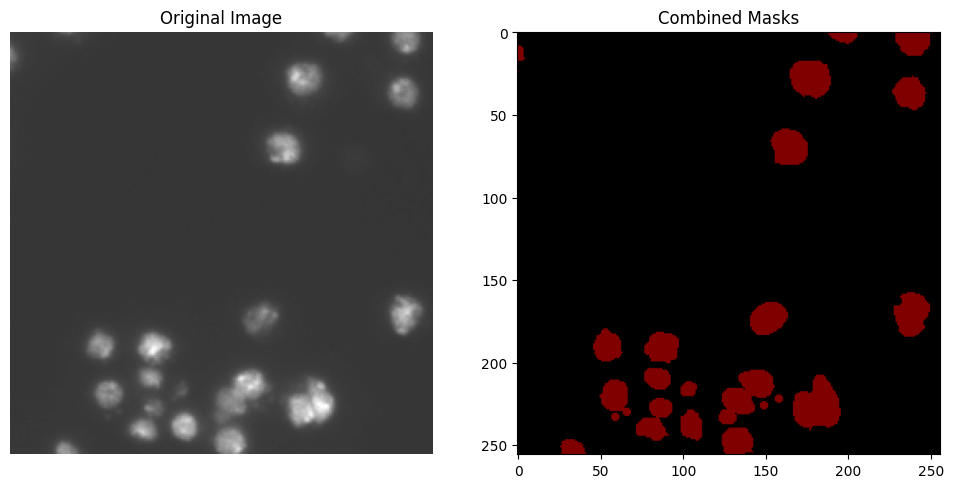



[  0 128]


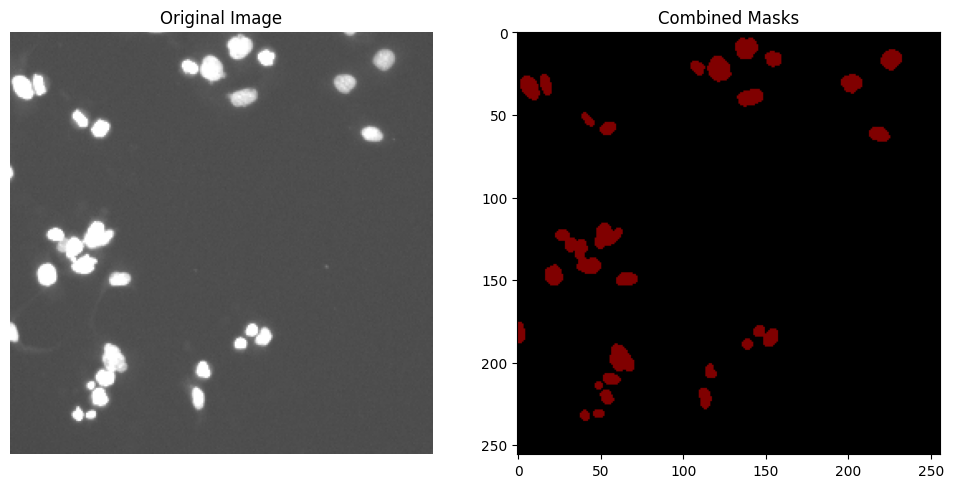

/n
[  0 128]


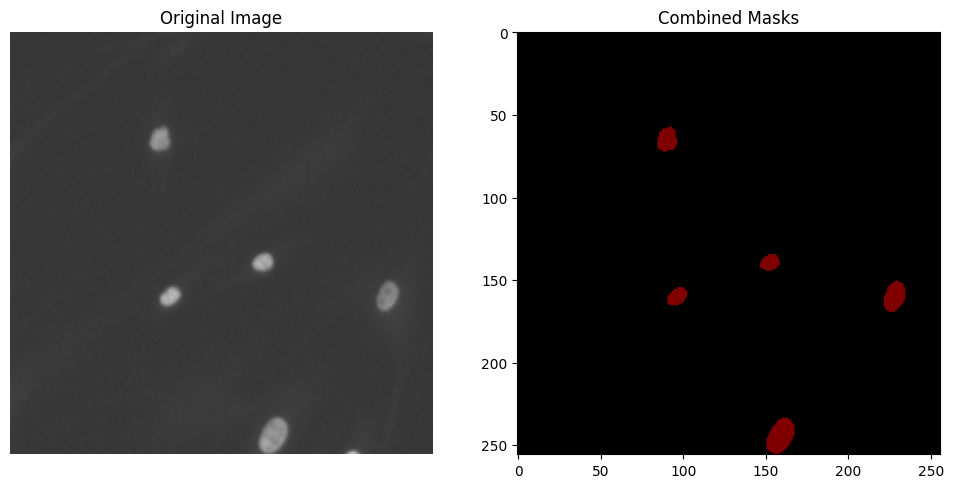

In [3]:

def plot_image_and_masks(image_path, masks_folder):
    # Load the image
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    alpha = 2.0  # Contrast control (1.0-3.0)
    beta = 50    # Brightness control (0-100)
    enhanced_image = cv2.convertScaleAbs(image, alpha=alpha, beta=beta)

    
    # Initialize the combined mask with zeros
    combined_mask = np.zeros_like(image)
    
    # Load and combine all masks
    mask_files = os.listdir(masks_folder)
    for mask_file in mask_files:
        mask_path = os.path.join(masks_folder, mask_file)
        mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
        # Apply color to the mask
        colored_mask = np.zeros_like(image)
        colored_mask[mask > 0] = [255, 0, 0]  # Red color for masks
        combined_mask = cv2.addWeighted(combined_mask, 1, colored_mask, 0.5, 0)
    #print(np.unique(combined_mask))
    
    # Plot the original image and combined mask side by side
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.imshow(enhanced_image)
    plt.title('Original Image')
    plt.axis('off')
    
    plt.subplot(1, 2, 2)
    plt.imshow(combined_mask)
    plt.title('Combined Masks')
    #plt.axis('off')
    
    plt.show()

# Data/Image_train/Image_000_00071198d059ba7f5914a526d124d28e6d010c92466da21d4a04cd5413362552.png
image_path = 'Data/Image_train/Image_000_00071198d059ba7f5914a526d124d28e6d010c92466da21d4a04cd5413362552.png'
masks_folder = 'Data/Label_train/Image_000'

plot_image_and_masks(image_path, masks_folder)

print('\n')


# Data/Image_train/Image_000_00071198d059ba7f5914a526d124d28e6d010c92466da21d4a04cd5413362552.png
image_path_1 = 'Data/Image_train/Image_503_be26966900aa0e5b41d5a8ecafe04281b37deb05c5cd027968d7b74143398174.png'
masks_folder_1 = 'Data/Label_train/Image_503'
plot_image_and_masks(image_path_1, masks_folder_1)

print('\n')

image_path_2 = 'Data/Image_train/Image_661_fc9269fb2e651cd4a32b65ae164f79b0a2ea823e0a83508c85d7985a6bed43cf.png'
masks_folder_2 = 'Data/Label_train/Image_661'
plot_image_and_masks(image_path_2, masks_folder_2)

- <span style="font-size:25px; color:indigo;"> Instead of having the testing dataset images in a directory structure that consists of subdirectories for each image, we want to consolidate all the images into a single folder. To achieve this, we create a new folder called UnseenData.</span>

- <span style="font-size:25px; color:indigo;">  All the images in the TestExtracted directory, where the images are currently organized into subdirectories, will be moved into UnseenData. During this process, each image will be renamed with a prefix Image_xxx, where xxx is a unique number. </span>

- <span style="font-size:25px; color:indigo;">  This simplifies accessing the images, as we no longer need to navigate through multiple subdirectories. The code provided performs this task, ensuring that all images are readily accessible in a single directory.</span>

- <span style="font-size:25px; color:indigo;"> This approach not only streamlines the file structure but also makes it easier to handle and process the images for further analysis or model testing. By renaming and consolidating the images, we ensure a more efficient workflow. </span>

In [21]:

def rename_unseen_data(path_from, path_to):
    os.makedirs(path_to, exist_ok=True)

    counter =0

    indices_firts = sorted(os.listdir(path_from))

    for image_path1 in indices_firts:
        first_path = os.path.join(path_from, image_path1)
        #print(first_path)
        indices_second = os.listdir(first_path)

        for image_path2 in indices_second:
            secondond_path =os.path.join(first_path, image_path2 )
            #print(secondond_path)

            indices_third = os.listdir(secondond_path)

            for image_path3 in indices_third:
                full_path_to_image = os.path.join(secondond_path, image_path3)
                #print(full_path_to_image)

                if full_path_to_image.endswith('.png'):

                    destination_image_name= f'Image_{counter:03}_.png'
                    destination_image_path = os.path.join(path_to,destination_image_name )
                    shutil.copy(full_path_to_image, destination_image_path)

                    counter = counter +1

        




path_from='data-science-bowl-2018/TestExtracted'
path_to ='UnseenData'

rename_unseen_data(path_from, path_to)